In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, BatchNormalization, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

%matplotlib inline

2022-12-30 20:28:54.413211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 20:28:54.537313: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-30 20:28:54.941888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/parth/miniconda3/lib/:/home/parth/miniconda3/envs/env_tensorflow/lib/
2022-12-30 20:28:54.941955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_

In [2]:
gpu_device = tf.DeviceSpec(device_type="GPU", device_index=0)

In [3]:
with tf.device(gpu_device.to_string()):
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print (f"Training dataset size {x_train.shape[0]}")
print (f"Test dataset size {x_test.shape[0]}")

2022-12-30 20:28:59.471146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-30 20:28:59.476023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-30 20:28:59.476252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-30 20:28:59.476918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Training dataset size 60000
Test dataset size 10000


In [4]:
x_train = x_train.astype(np.float32)
x_train /= 255.0
x_test = x_test.astype(np.float32)
x_test /= 255.0

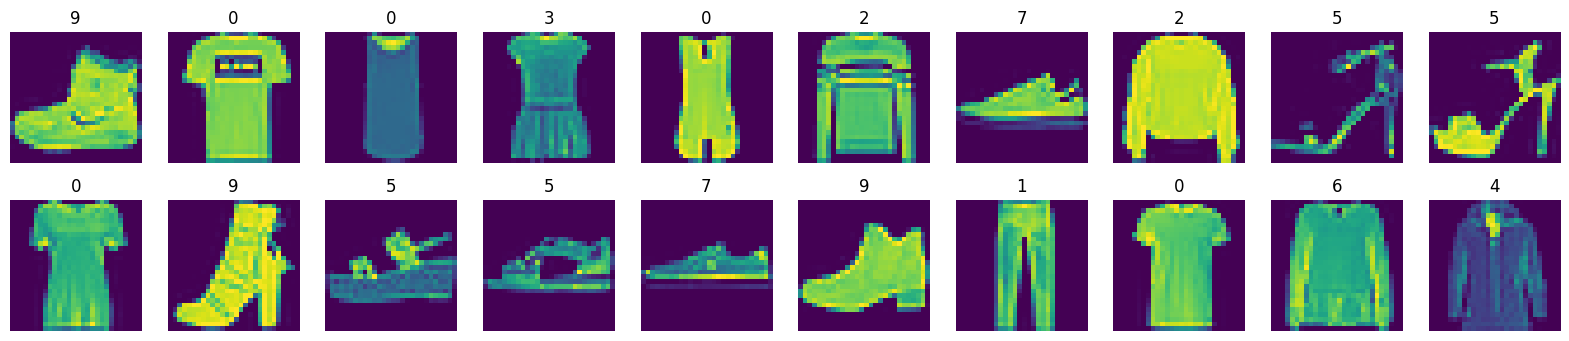

In [5]:
plt.figure(figsize=(20, 4), dpi=100)
for idx, image in enumerate(x_train):
    if idx >= 20:
        break
    plt.subplot(2, 10, idx+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(y_train[idx])

In [6]:
batch_size = 32
epochs = 10
dropout_rate = 0.4

In [7]:
def build_model():
    return Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", \
            data_format="channels_last", kernel_initializer='he_uniform', input_shape=(28, 28, 1)), # ((28-3 + 2*0) / 1) + 1 = 26
        MaxPool2D(), # 26 / 2 = 13
        Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", \
            kernel_initializer='he_uniform'), # ((13-3 + 2*0) / 1) + 1 = 11
        Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", \
            kernel_initializer='he_uniform'), # ((11-3 + 2*0) / 1) + 1 = 9
        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", \
            kernel_initializer='he_uniform'), # ((9-3 + 2*0) / 1) + 1 = 7
        Flatten(), # 7 * 7 * 256 (256 i.e. last conv2d filters)
        Dense(units=256 * 7 * 7, activation="relu", kernel_initializer='he_uniform'),
        Dropout(dropout_rate),
        Dense(units=1024, activation="relu", kernel_initializer='he_uniform'),
        Dropout(dropout_rate),
        Dense(units=512, activation="relu", kernel_initializer='he_uniform'),
        Dropout(dropout_rate),
        Dense(units=10, activation="softmax"),
    ])

In [8]:
with tf.device(gpu_device.to_string()):
    model = build_model()
    model.compile(optimizer=K.optimizers.SGD(learning_rate=1e-2, momentum=0.9), \
        loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                        

In [9]:
with tf.device(gpu_device.to_string()):
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(
            x_test, y_test
        ),
        validation_batch_size=1,
        use_multiprocessing=True,
        workers=10,
    )

Epoch 1/10


2022-12-30 20:29:34.039906: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-30 20:29:34.739663: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 20:29:34.771397: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 20:29:34.771475: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-30 20:29:34.805896: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 20:29:34.806023: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-30 20:29:35.448133: I tensorflow/stream_executor/cuda/c

1875/1875 [==============================] - 92s 48ms/step - loss: 0.5300 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.3293 - val_sparse_categorical_accuracy: 0.8830
Epoch 2/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3162 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.2842 - val_sparse_categorical_accuracy: 0.8979
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2641 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.2704 - val_sparse_categorical_accuracy: 0.9030
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2258 - sparse_categorical_accuracy: 0.9169 - val_loss: 0.2565 - val_sparse_categorical_accuracy: 0.9073
Epoch 5/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.2544 - val_sparse_categorical_accuracy: 0.9098
Epoch 6/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1710 - sp

In [10]:
train_loss = history.history["loss"]
test_acc = history.history["val_sparse_categorical_accuracy"]

Text(0.5, 1.0, 'Training Loss vs Test Accuracy')

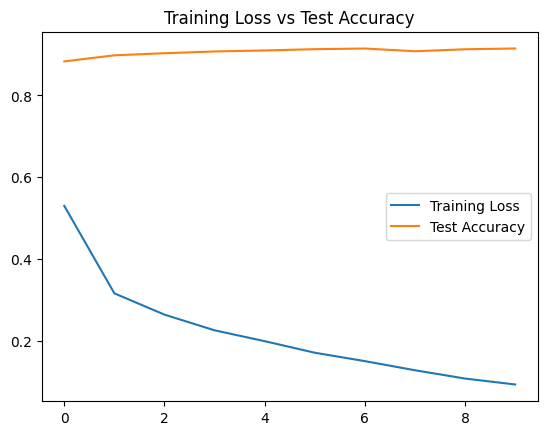

In [11]:
plt.plot(train_loss, label="Training Loss")
plt.plot(test_acc, label="Test Accuracy")
plt.legend(loc="center right")
plt.title("Training Loss vs Test Accuracy")

Plotting Test Images 

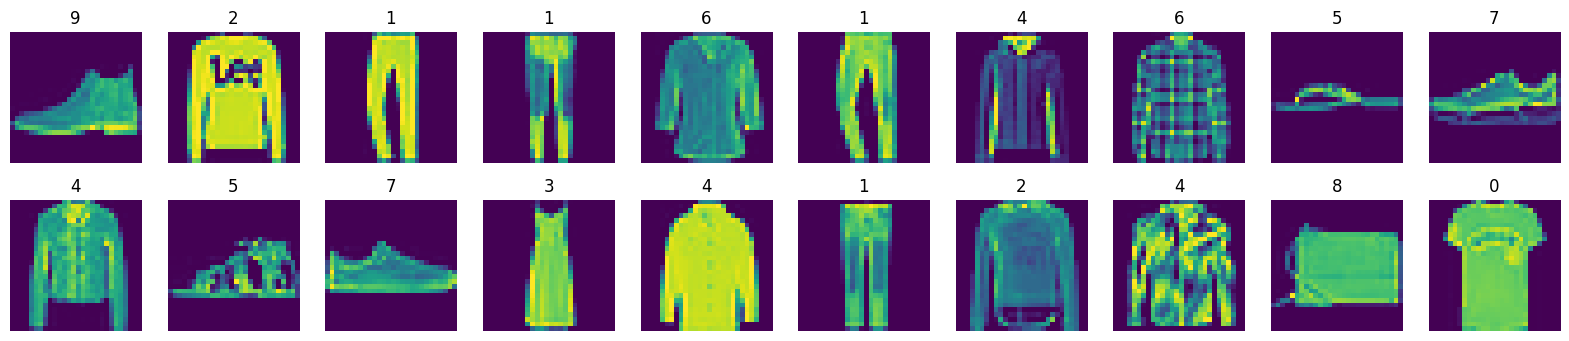

In [12]:
plt.figure(figsize=(20, 4), dpi=100)
for idx, image in enumerate(x_test):
    if idx >= 20:
        break
    plt.subplot(2, 10, idx+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(y_test[idx])

In [13]:
with tf.device(gpu_device.to_string()):
    loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
    print (f"Loss: {loss:.4f}; Accuracy: {acc:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.3221 - sparse_categorical_accuracy: 0.9146
Loss: 0.3221; Accuracy: 0.9146


In [14]:
model.save("fashion_mnist_tensorflow.h5")